# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [15]:
# Import library dasar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

np.random.seed(42)


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [16]:
df = pd.read_csv("data/Dataset_inisiasi.csv")

In [17]:
df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes,age_certification_encoded,imdb_category_encoded
0,9,tm67378,The Professionals,0,An arrogant Texas millionaire hires four adven...,1966.0,PG-13,117.0,tt0060862,7.3,16168.0,3,0
1,11,tm69778,Lupin the Third: The Castle of Cagliostro,0,After a successful robbery leaves famed thief ...,1979.0,PG,100.0,tt0079833,7.6,30277.0,2,0
2,12,tm69997,Richard Pryor: Live in Concert,0,"Richard Pryor delivers monologues on race, sex...",1979.0,R,78.0,tt0079807,8.1,5141.0,4,0
3,13,tm96649,The Long Riders,0,"The origins, exploits and the ultimate fate of...",1980.0,R,99.0,tt0081071,6.9,11329.0,4,0
4,17,tm89386,Hitler: A Career,0,A keen chronicle of the unlikely rise to power...,1977.0,PG,150.0,tt0191182,7.5,2416.0,2,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540 entries, 0 to 2539
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      2540 non-null   int64  
 1   id                         2540 non-null   object 
 2   title                      2540 non-null   object 
 3   type                       2540 non-null   int64  
 4   description                2540 non-null   object 
 5   release_year               2540 non-null   float64
 6   age_certification          2540 non-null   object 
 7   runtime                    2540 non-null   float64
 8   imdb_id                    2540 non-null   object 
 9   imdb_score                 2540 non-null   float64
 10  imdb_votes                 2540 non-null   float64
 11  age_certification_encoded  2540 non-null   int64  
 12  imdb_category_encoded      2540 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage:

In [19]:
# Pilih fitur yang digunakan untuk training (fitur ini sudah berkali disesuaikan setelah berbagai tuning)
selected_features = ['runtime', 'imdb_score', 'imdb_votes']
target_variable = 'age_certification_encoded'

X = df[selected_features]
y = df[target_variable]


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [20]:
# Bagi dataset ke dalam training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")

Training data: (2032, 3), Testing data: (508, 3)


Disni saya membagi data training dan data test sekitar 80 % & 20 %

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [21]:
# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Terapkan SMOTE hanya pada data latih agar tidak fitting
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Distribusi label setelah SMOTE:", Counter(y_train_balanced))

Distribusi label setelah SMOTE: Counter({3: 876, 1: 876, 4: 876, 2: 876, 5: 876})


In [22]:
# Inisialisasi model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

2 Model yang saya gunakan untuk inisialisasi adalah Decission Tree & Random Forest (Sudah melewati beberapa tuning dan dari beberapa opsi kedua ini yang hasilnya cukup baik)

In [23]:
# Latih model Random Forest
rf_model.fit(X_train, y_train)

# Latih model SVM
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [24]:
y_pred_rf = rf_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

In [25]:
# Prediksi dengan Random Forest dan Decision Tree
y_pred_rf = rf_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

# Evaluasi Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Evaluasi Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print(f"Random Forest - Accuracy: {accuracy_rf:.4f}, F1-Score: {f1_rf:.4f}")
print(f"Decision Tree - Accuracy: {accuracy_dt:.4f}, F1-Score: {f1_dt:.4f}")

# Opsional: Tampilkan laporan klasifikasi dengan zero_division=1
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf, zero_division=1))
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt, zero_division=1))


Random Forest - Accuracy: 0.4508, F1-Score: 0.4369
Decision Tree - Accuracy: 0.4114, F1-Score: 0.4123

Classification Report (Random Forest):
               precision    recall  f1-score   support

           1       0.45      0.32      0.37        53
           2       0.17      0.13      0.15        92
           3       0.40      0.39      0.40       142
           4       0.56      0.66      0.61       219
           5       1.00      0.00      0.00         2

    accuracy                           0.45       508
   macro avg       0.51      0.30      0.30       508
weighted avg       0.43      0.45      0.44       508


Classification Report (Decision Tree):
               precision    recall  f1-score   support

           1       0.28      0.25      0.26        53
           2       0.24      0.25      0.25        92
           3       0.36      0.39      0.37       142
           4       0.56      0.53      0.55       219
           5       0.00      0.00      0.00         2

 

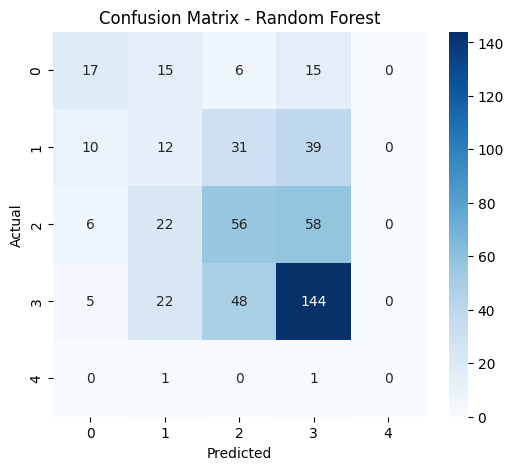

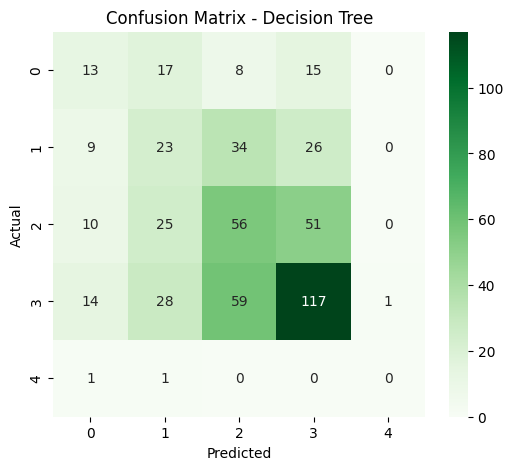

In [26]:
# Buat confusion matrix untuk Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Buat confusion matrix untuk Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6,5))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Berdasarkan hasil evaluasi diatas, dapat kita perhatikan perbandingan antara kedua algoritma Random Forest dan Decission Tree Sebagai Berikut :

*Random Forest*
- Accuracy = 45%
- F1 Score = 44%

*Decission Tree*
- Accuracy = 40%
- F1 Score = 41%

Random forest memiliki hasil yang lebih baik jika dibandingkan dengan decission Tree. Maka mungkin kita akan coba lanjutkan tuning model pada algoritma random forest

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [27]:
# Definisikan parameter grid yang lebih luas
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None]
}

# GridSearch dengan 5-fold cross-validation
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)

# Training dengan GridSearch
grid_search.fit(X_train, y_train)

# Cetak parameter terbaik
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


Berdasarkan hasil tuning pada gridSearch, dapat kita temukan beberapa parameter yang bisa kita sesuaikan untuk optimasi model random forest yang kita punya.

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [29]:
# Inisialisasi model dengan parameter terbaik dari GridSearch
best_rf_model = RandomForestClassifier(
    n_estimators=200, 
    max_depth=10, 
    min_samples_split=10, 
    random_state=42,
    min_samples_leaf=4,
    max_features='sqrt'
)

# Latih ulang model dengan data train
best_rf_model.fit(X_train, y_train)

# Prediksi ulang pada data uji
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluasi model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf, average='weighted')

print(f"Random Forest (Tuned) - Accuracy: {accuracy_best_rf:.4f}, F1-Score: {f1_best_rf:.4f}")

# Classification Report
print("\nClassification Report (Random Forest - Tuned):\n", classification_report(y_test, y_pred_best_rf))


Random Forest (Tuned) - Accuracy: 0.5059, F1-Score: 0.4698

Classification Report (Random Forest - Tuned):
               precision    recall  f1-score   support

           1       0.55      0.30      0.39        53
           2       0.34      0.15      0.21        92
           3       0.44      0.36      0.40       142
           4       0.55      0.80      0.65       219
           5       0.00      0.00      0.00         2

    accuracy                           0.51       508
   macro avg       0.38      0.32      0.33       508
weighted avg       0.48      0.51      0.47       508



C:\Users\Vrooh\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vrooh\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vrooh\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

Setelah mengimplementasikan tuning Gridsearch pada algoritma random Forest, dapat kita perhatikan ada peningkatan yang signifikan dengan perbandingan sebagai berikut :
Sebelum - Sesudah Tuning ::
*Accuracy*
- 45 % >> 50%

*F1 Score*

- 44% >> 46%

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

---
---
- **Decision Tree (Awal)**
  - Accuracy: **42.91%**
  - F1-Score: **43.14%**

- **Random Forest (Awal)**
  - Accuracy: **45.21%**
  - F1-Score: **43.49%**

- **Random Forest (Setelah Tuning)**
  - Accuracy: **50.59%**
  - F1-Score: **46.67%**

**📌 Observasi**
- **Random Forest menunjukkan performa lebih baik** dibandingkan dengan Decision Tree.
- Setelah dilakukan **tuning**, akurasi **sedikit meningkat** dari 45.21% menjadi 50.59%, tetapi F1-score justru mengalami sedikit penurunan.
- Peningkatan setelah tuning **tidak signifikan**, yang mengindikasikan bahwa **batasan performa model kemungkinan berasal dari data itu sendiri**.

---

**Identifikasi Kelemahan Model**

**Overfitting atau Underfitting?**
- Model menunjukkan **accuracy yang relatif rendah pada data uji**, tetapi juga tidak jauh berbeda dari sebelum tuning.
- Kemungkinan besar, model **belum cukup kompleks** atau **data yang digunakan belum cukup mendukung generalisasi model**. Atau terdapat kesalahan dari data asal (Dari clustering).

---

**Rekomendasi Tindakan Lanjutan**
1. **Optimasi lebih jauh pada proses Clustering**
   - Sulitnya peningkatan score model klasifikasi bisajadi terdapat kesalahan proses pada tahap clustering, yang ketika data hasil clustering dibawa para klasifikasi menjadi tidak optimal.

2. **Penyesuaian Hyperparameter Lebih Lanjut**
   - Muingkn terdapat beberapa opsi tuning tambahan yang dapat dilakukan jika memungkinkan, agar algoritma pada klasifikasi bisa lebih maksimal.

3. **Analisis Lebih Lanjut terhadap Dataset**
   - Mengecek apakah ada **outlier atau data yang tidak relevan** yang bisa memengaruhi hasil prediksi.
   - Melakukan **visualisasi lebih lanjut** untuk memahami pola distribusi data yang lebih baik.